<a href="https://colab.research.google.com/github/aneekbsws/deeplearning/blob/main/shallow_NN_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
# from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [ ]:
# Some pre-requisite work (Copied from Coursera planar_utils.py)
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [ ]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [ ]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
X, Y = load_planar_dataset()

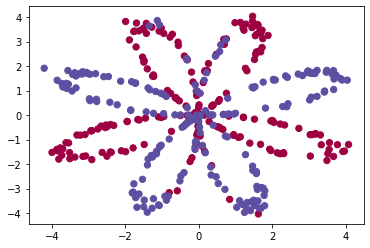

In [ ]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [ ]:
# Seeing the shape of the inputs
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


In [ ]:
def layer_sizes(X,Y):
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]
  return n_x, n_h, n_y

In [ ]:
def init_params(n_x, n_h, n_y):
  W1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeros((n_y,1))
  parameters = {"W1":W1, "W2":W2, "b1":b1, "b2":b2}
  return parameters

In [ ]:
def forward_prop(X, parameters):
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]
  # print(W1.shape)
  # print(X.shape)
  Z1 = np.dot(W1,X)+b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1)+b2
  A2 = sigmoid(Z2)
  cache = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}
  return A2, cache

In [ ]:
def compute_cost(A2, Y):
  m = Y.shape[1]
  logs = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
  cost = -(1/m)*np.sum(logs)
  return cost

In [ ]:
def back_prop(parameters, cache, X, Y):
  m = X.shape[1]
  W1 = parameters["W1"]
  W2 = parameters["W2"]
  A1 = cache["A1"]
  Z1 = cache["Z1"]
  A2 = cache["A2"]
  Z2 = cache["Z2"]

  dZ2 = A2 - Y 
  dW2 = (1/m)*np.dot(dZ2, A2.T)
  db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1,2))
  dW1 = (1/m)*np.dot(dZ1, X.T)
  db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)

  grads = {"dZ1":dZ1, "dW1" : dW1, "db1": db1, "dW2": dW2, "db2": db2, "dZ2": dZ2}
  return grads

In [ ]:
def update_params(parameters, grads, learning_rate):
  dW1 = grads["dW1"]
  dW2 = grads["dW2"]
  db1 = grads["db1"]
  db2 = grads["db2"]
  W1 = copy.deepcopy(parameters["W1"])
  b1 = parameters["b1"]
  W2 = copy.deepcopy(parameters["W2"])
  b2 = parameters["b2"]
  W1 = W1 - (learning_rate*dW1)
  b1 = b1 - (learning_rate*db1)
  W2 = W2 - (learning_rate*dW2)
  b2 = b2 - (learning_rate*db2)
  parameters = {"W1":W1, "W2":W2, "b1":b1, "b2":b2}
  return parameters

In [ ]:
def integrated_model(X,Y,learning_rate, print_cost = True, number_of_itr=100000):
  np.random.seed(3)
  n_x, n_h, n_y =  layer_sizes(X,Y)
  parameters = init_params(n_x, n_h, n_y)
  for i in range(0,number_of_itr):
    A2, cache = forward_prop(X, parameters)
    cost = compute_cost(A2, Y)
    grads = back_prop(parameters, cache, X, Y)
    parameters = update_params(parameters, grads, learning_rate)
    if(print_cost == True and i%10000 == 0):
      print ("Cost after iteration %i: %f" %(i, cost))
  return parameters

In [ ]:
def predict(X, parameters):
  A2, cache = forward_prop(X, parameters)
  print(X.shape)
  y_pred = np.where(A2>0.5,1,np.where(A2<=0.5,0,1))
  return y_pred

Cost after iteration 0: 0.693162
Cost after iteration 10000: 0.601223
Cost after iteration 20000: 0.599151
Cost after iteration 30000: 0.598068
Cost after iteration 40000: 0.597349
Cost after iteration 50000: 0.596819
Cost after iteration 60000: 0.596402
Cost after iteration 70000: 0.596061
Cost after iteration 80000: 0.595773
Cost after iteration 90000: 0.595523
(2, 1038240)


Text(0.5, 1.0, 'Decision boundary of floral pattern')

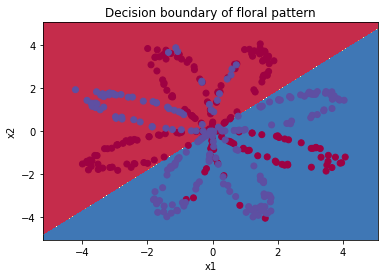

In [ ]:
# Testing the models
parameters = integrated_model(X,Y,learning_rate = 1, print_cost = True, number_of_itr = 100000)
plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y)
plt.title("Decision boundary of floral pattern")

In [ ]:
# Print accuracy
predictions = predict(X,parameters)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

(2, 400)
Accuracy: 67%


Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 1 hidden units: 67.25 %
Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 2 hidden units: 67.25 %
Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 3 hidden units: 67.25 %
Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 4 hidden units: 67.25 %
Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 5 hidden units: 67.25 %
Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 20 hidden units: 67.25 %
Cost after iteration 0: 0.693162
(2, 1038240)
(2, 400)
Accuracy for 50 hidden units: 67.25 %


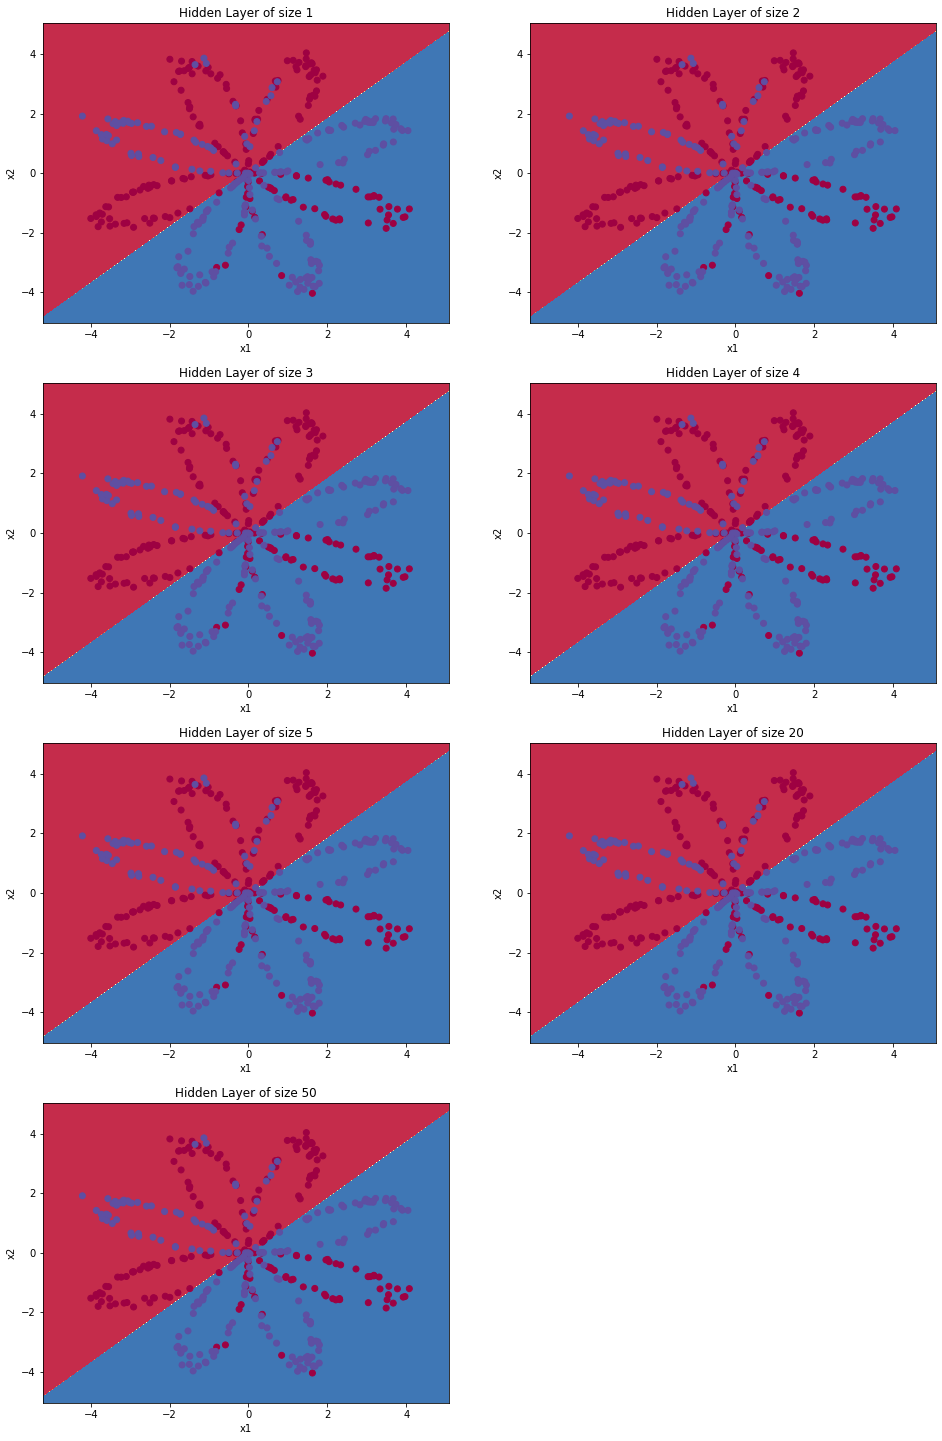

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = integrated_model(X, Y, learning_rate=1.2,  number_of_itr= 5000)
    plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y)
    predictions = predict(X, parameters)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))